In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [3]:
gc_df = pd.read_csv("german_credit.csv")

In [4]:
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [7]:
gc_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [8]:
gc_df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
gc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [10]:
gc_df.isnull().values.any()

False

In [11]:

gc_df.isnull().sum().sum()

0

In [12]:
gc_df.isna().values.any()

False

In [13]:
gc_df.isna().sum().sum()

0

In [14]:
gc_df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [15]:
X = gc_df.drop('default', axis=1)
Y = gc_df[['default']]
X.shape
Y.shape

(1000, 1)

In [29]:
X.head()
Y.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


,default
0,0
1,1
2,0
3,0
4,1


In [18]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 50:50 ratio

X1, X2, Y1, Y2 = train_test_split(X, Y, test_size=0.50, random_state=1)
print("X_train ", X1.shape)
print("X_test ", X2.shape)
print("Y_train ", Y1.shape)
print("Y_test ", Y2.shape)

X_train  (500, 20)
X_test  (500, 20)
Y_train  (500, 1)
Y_test  (500, 1)


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [20]:
X1 = pd.get_dummies(X1)

In [21]:
X1.shape

(500, 61)

In [22]:
X1.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
789,40,5998,4,3,27,1,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
179,21,571,4,4,65,2,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
27,12,409,3,3,42,2,1,0,0,1,...,0,1,0,1,0,0,1,0,0,1
33,12,1264,4,4,57,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
334,24,4110,3,4,23,2,2,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [23]:
X1.dtypes

duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_0 <= ... < 200 DM                                        uint8
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_all credits at this bank paid back duly                      

In [24]:
X1.info

<bound method DataFrame.info of      duration_in_month  credit_amount  installment_as_income_perc  \
789                 40           5998                           4   
179                 21            571                           4   
27                  12            409                           3   
33                  12           1264                           4   
334                 24           4110                           3   
361                 12           3399                           2   
293                 42           4796                           4   
782                 12           1410                           2   
959                 24           3069                           4   
5                   36           9055                           2   
197                 12            951                           4   
790                 21           1188                           2   
392                 36           3249                           2   
54

In [27]:
X1.isnull().values.any()
X1.isnull().sum().sum()
X1.isna().values.any()
X1.isna().sum().sum()
X1.describe()
X1.describe().transpose()

False

0

False

0

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,20.978000,3323.076000,2.916000,2.860000,36.024000,1.400000,1.138000,0.262000,0.278000,0.072000,...,0.686000,0.188000,0.158000,0.63800,0.014000,0.190000,0.612000,0.388000,0.040000,0.960000
std,11.850671,2875.025473,1.125824,1.076437,11.792266,0.576771,0.345245,0.440163,0.448462,0.258747,...,0.464581,0.391103,0.365106,0.48106,0.117608,0.392694,0.487783,0.487783,0.196155,0.196155
min,4.000000,343.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1369.250000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,18.000000,2342.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,4070.250000,4.000000,4.000000,43.000000,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
duration_in_month,500.0,20.978,11.850671,4.0,12.00,18.0,24.00,60.0
credit_amount,500.0,3323.076,2875.025473,343.0,1369.25,2342.5,4070.25,18424.0
installment_as_income_perc,500.0,2.916,1.125824,1.0,2.00,3.0,4.00,4.0
present_res_since,500.0,2.860,1.076437,1.0,2.00,3.0,4.00,4.0
age,500.0,36.024,11.792266,19.0,27.00,33.0,43.00,75.0
credits_this_bank,500.0,1.400,0.576771,1.0,1.00,1.0,2.00,4.0
people_under_maintenance,500.0,1.138,0.345245,1.0,1.00,1.0,1.00,2.0
account_check_status_0 <= ... < 200 DM,500.0,0.262,0.440163,0.0,0.00,0.0,1.00,1.0
account_check_status_< 0 DM,500.0,0.278,0.448462,0.0,0.00,0.0,1.00,1.0
account_check_status_>= 200 DM / salary assignments for at least 1 year,500.0,0.072,0.258747,0.0,0.00,0.0,0.00,1.0


In [19]:
# Print Shape of model data

In [30]:
X1.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [31]:
X1.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.139030,-0.038817,-0.038696,...,-0.038749,-0.118875,0.196724,0.011255,-0.034287,-0.186423,-0.185221,0.185221,-0.127211,0.127211
credit_amount,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,0.138910,-0.082235,-0.088007,...,-0.109663,-0.072627,0.375525,-0.125468,-0.076678,-0.172477,-0.318831,0.318831,-0.062949,0.062949
installment_as_income_perc,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,-0.032336,0.054283,-0.041112,...,0.029932,-0.050538,0.037229,0.021447,-0.066777,-0.040887,0.009868,-0.009868,-0.039202,0.039202
present_res_since,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,-0.057776,0.030969,-0.035688,...,-0.256385,0.110245,-0.025189,-0.005186,0.047173,0.015645,-0.065494,0.065494,-0.087317,0.087317
age,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,-0.077660,-0.008085,0.051976,...,-0.027520,-0.185217,0.131774,-0.194528,0.115356,0.081238,-0.144705,0.144705,-0.027273,0.027273
credits_this_bank,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.074201,-0.074377,-0.032228,...,0.050856,-0.014214,-0.053292,0.002889,0.094538,0.017696,0.004274,-0.004274,-0.017713,0.017713
people_under_maintenance,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,-0.093340,0.101191,0.000718,...,-0.091633,-0.014426,0.001558,-0.084729,-0.047677,0.116626,-0.026513,0.026513,0.007102,-0.007102
account_check_status_0 <= ... < 200 DM,0.139030,0.138910,-0.032336,-0.057776,-0.077660,-0.074201,-0.093340,1.000000,-0.369723,-0.165964,...,-0.018287,0.027613,0.091056,-0.062256,-0.032286,0.001275,-0.029607,0.029607,-0.051992,0.051992
account_check_status_< 0 DM,-0.038817,-0.082235,0.054283,0.030969,-0.008085,-0.074377,0.101191,-0.369723,1.000000,-0.172841,...,-0.109210,0.067046,-0.036253,0.021532,0.002052,0.006714,0.100149,-0.100149,0.010024,-0.010024
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.038696,-0.088007,-0.041112,-0.035688,0.051976,-0.032228,0.000718,-0.165964,-0.172841,1.000000,...,0.038410,-0.074618,-0.078234,0.000515,0.098519,0.042601,0.063004,-0.063004,-0.017373,0.017373


### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [32]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.30, random_state=1)
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("Y_train ", Y_train.shape)
print("Y_test ", Y_test.shape)

X_train  (350, 61)
X_test  (150, 61)
Y_train  (350, 1)
Y_test  (150, 1)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [34]:
Rf_model = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion='entropy',random_state=9999 )

In [35]:
Rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [36]:
y_predict_Rf=Rf_model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [37]:
Rf_acc=metrics.accuracy_score(Y_test,y_predict_Rf)
print(Rf_acc)

0.7533333333333333


In [38]:
cm=metrics.confusion_matrix(Y_test,y_predict_Rf)
print(cm)

[[96  8]
 [29 17]]


### Q6 Show the list of the features importance( 1 Marks)

In [39]:
Feature_importances = Rf_model.feature_importances_
Feature_importances

array([0.06112767, 0.09933503, 0.04220622, 0.03213619, 0.08781319,
       0.01903031, 0.01031466, 0.01547005, 0.02733667, 0.00861822,
       0.04524331, 0.00781943, 0.02242615, 0.00983811, 0.01608262,
       0.0124328 , 0.00589626, 0.0066611 , 0.02477934, 0.01205215,
       0.0148942 , 0.00403403, 0.00211591, 0.01333561, 0.00223354,
       0.00123962, 0.00630173, 0.01653981, 0.01204021, 0.00670521,
       0.01345498, 0.01466532, 0.01872503, 0.0165422 , 0.01339339,
       0.00652272, 0.01619654, 0.00300311, 0.00644314, 0.01427271,
       0.00890242, 0.00960727, 0.0113141 , 0.01394668, 0.01460956,
       0.01710441, 0.01046203, 0.01280681, 0.01705504, 0.00882843,
       0.00969901, 0.0122814 , 0.01016244, 0.01371228, 0.01420415,
       0.00074438, 0.01042982, 0.01328474, 0.01420996, 0.00388469,
       0.00347189])

In [40]:
indices = np.argsort(Feature_importances)[::-1]
names = [X_train.columns[i] for i in indices]

<BarContainer object of 61 artists>

([<matplotlib.axis.XTick at 0x1a1fe3a320>,
 <a list of 61 Text xticklabel objects>)

Text(0.5, 1.0, 'Feature Importance')

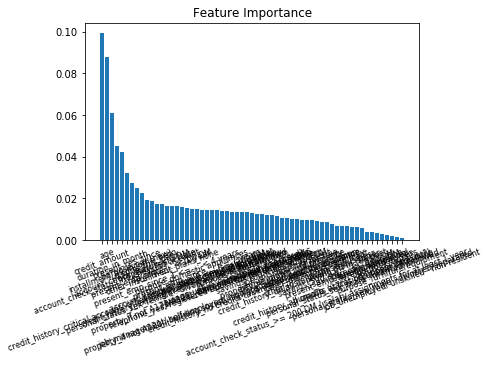

In [41]:
plt.bar(range(X_train.shape[1]), Feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=20, fontsize = 8)
plt.title("Feature Importance")
plt.show()

In [42]:
import pandas as pd
feature_importances = pd.DataFrame(Rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
credit_amount,0.099335
age,0.087813
duration_in_month,0.061128
account_check_status_no checking account,0.045243
installment_as_income_perc,0.042206
present_res_since,0.032136
account_check_status_< 0 DM,0.027337
purpose_car (new),0.024779
credit_history_critical account/ other credits existing (not at this bank),0.022426
credits_this_bank,0.019030


In [45]:
#!pip install rfpimp
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(Rf_Model, X_train, Y_train):
    return r2_score(Y_train, Rf_model.predict(X_train))

perm_imp_rfpimp = permutation_importances(Rf_model, X_train, Y_train, r2)
perm_imp_rfpimp

,Importance
Feature,
account_check_status_no checking account,0.145833
age,0.092803
purpose_car (new),0.053030
installment_as_income_perc,0.039773
credit_history_critical account/ other credits existing (not at this bank),0.026515
duration_in_month,0.026515
credit_amount,0.013258
present_emp_since_... < 1 year,0.013258
personal_status_sex_male : divorced/separated,0.000000


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [48]:
# Evaluate using Cross Validation
from sklearn import model_selection
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=1)

In [49]:
results = model_selection.cross_val_score(Rf_model, X1, Y1, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

Mean Square Error: 0.242 (0.075)


In [50]:
results = model_selection.cross_val_score(Rf_model, X1, Y1, scoring='r2', cv=kfold)
print("Mean Square Error: %.3f (%.3f)" % (results.mean(), results.std()))
#Average is very bad and standard deviation is high. The model is very bad

Mean Square Error: -0.148 (0.317)


In [0]:
#Calculate Mean score

In [51]:
cv=cross_val_score(Rf_model, X_train, Y_train, cv=10)
cv.mean()

0.7314285714285715

In [0]:
# Calculate score standard deviation using std()

In [52]:
cv.std()

0.040808162448816306

# Q8 Print the confusion matrix( 1 Marks)

In [53]:
print("=== Confusion Matrix ===")
print(metrics.confusion_matrix(Y_test, y_predict_Rf))

=== Confusion Matrix ===
[[96  8]
 [29 17]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [54]:
from sklearn.metrics import classification_report

In [55]:

print("=== Classification Report ===")
print(classification_report(Y_test, y_predict_Rf))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       104
           1       0.68      0.37      0.48        46

    accuracy                           0.75       150
   macro avg       0.72      0.65      0.66       150
weighted avg       0.74      0.75      0.73       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

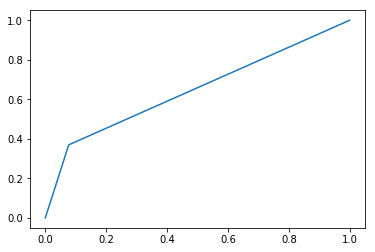

In [57]:
fpr, tpr, _=roc_curve(Y_test, y_predict_Rf)
plt.plot(fpr, tpr)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [58]:

print('AUC', roc_auc_score(Y_test, y_predict_Rf))

AUC 0.6463210702341138


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [59]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [61]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, Y_train)
    Rf_model.fit(X_, y_)
    y_pred = Rf_model.predict(X_test)
    
    acc = accuracy_score(y_pred, Y_test)
    accuracy.append(acc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [62]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7346666666666667
Standard deviation:  0.02039607805437114
